## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [2]:
# Reading dataset
df=pd.read_csv("Churn.csv")

In [3]:
# loading dataset
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Understanding

In [4]:
# There are 10,000 rows and 14 columns
df.shape

(10000, 14)

In [5]:
# Checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# There are no null values in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# As it can be seen this dataset's targer column is imbalanced there are 7963 zero's and 2037 one's
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
# The describe function will display all the decriptive statistics of the data including mean, std, min, max values.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# The nunique() function is used to count distinct observations over requested axis. Return Series with number of distinct observations.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Displaying the head of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Displaying the column names of the dataset.
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Data Visualization

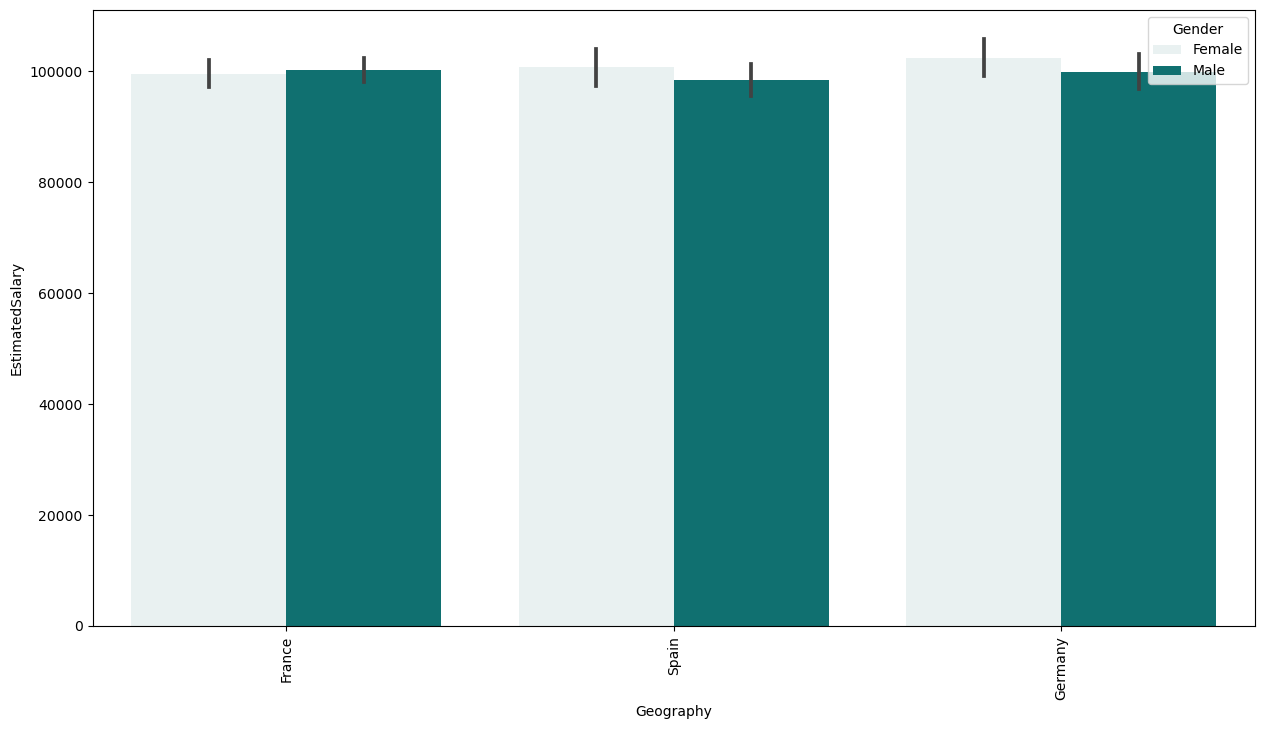

In [12]:
# Visualizing barplot where Geography is on x-axis and estimated salary is on y axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Geography',y='EstimatedSalary',hue='Gender',color='teal',data=df);

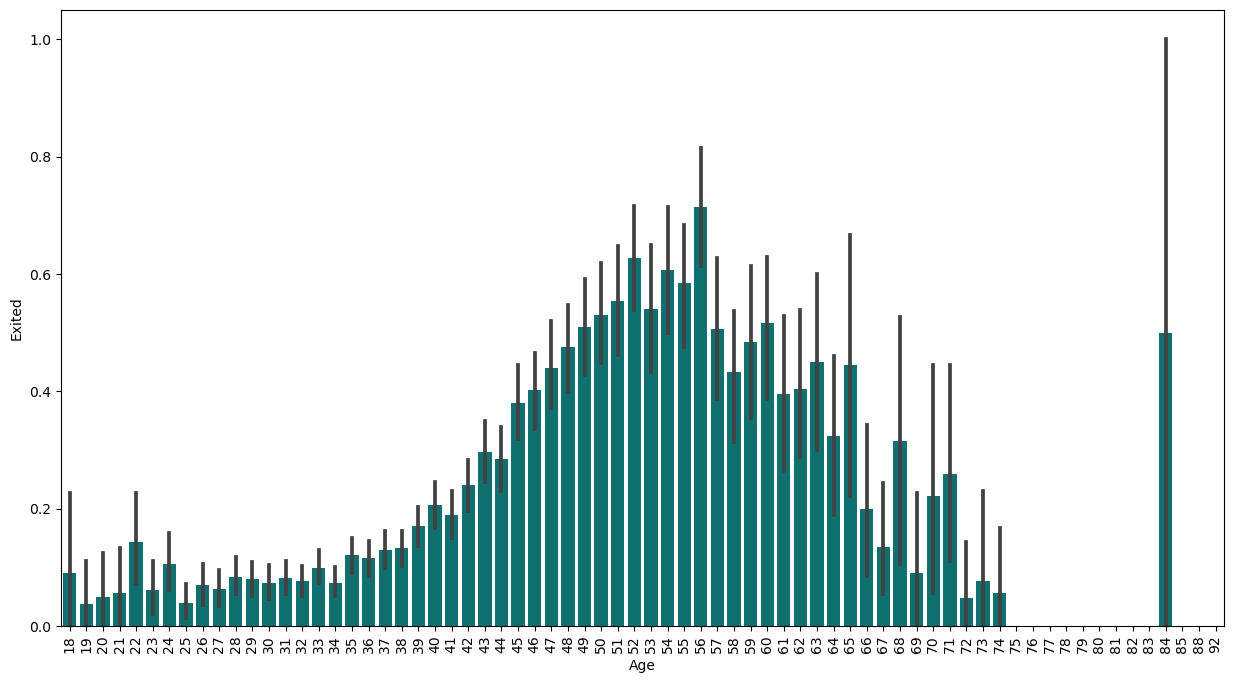

In [13]:
# Visualizing barplot where age is taken on x axis and exited in on y axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Exited',color='teal',data=df);

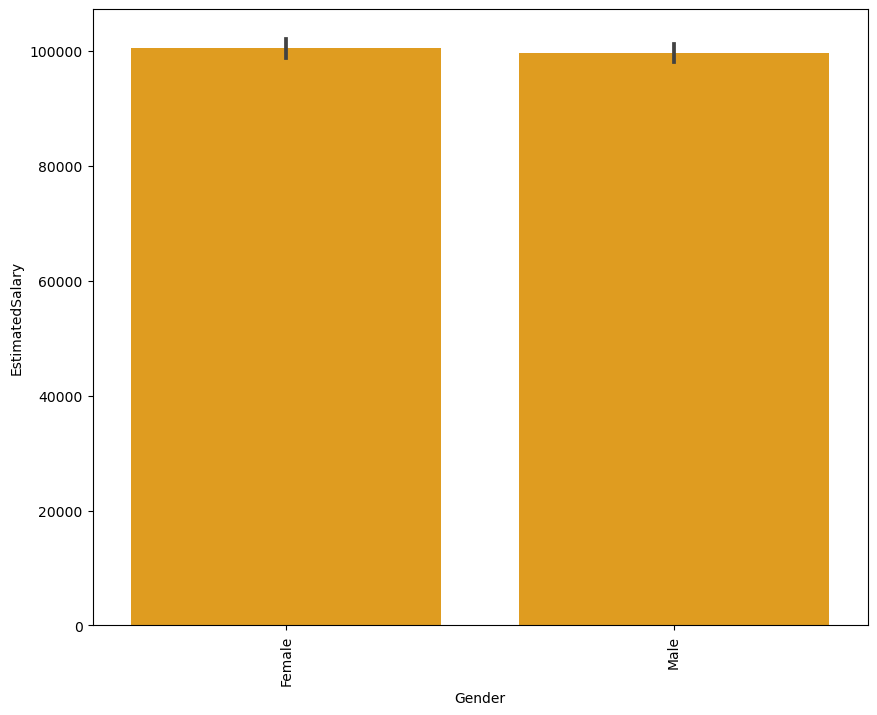

In [14]:
# Visualizing barplot where gender is taken on x axis and estimated salary is taken on y axis
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='EstimatedSalary',color='orange',data=df);

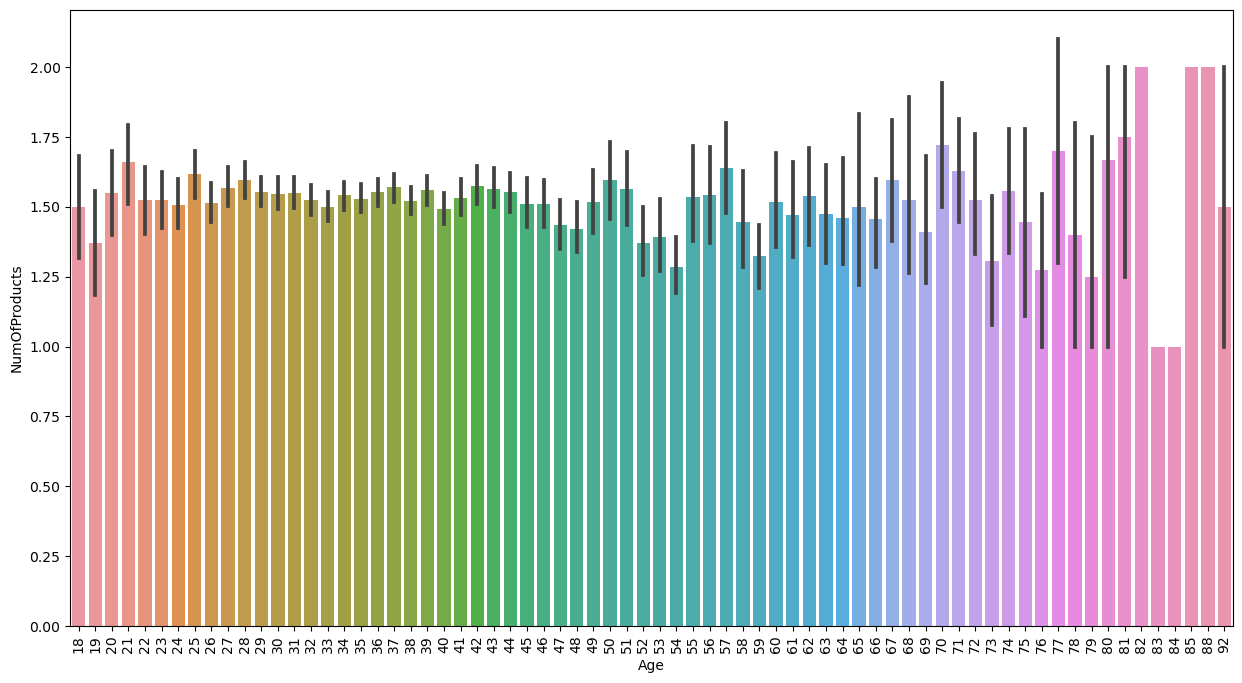

In [15]:
# Visualizing barplot where Age is taken on x axis and NumOfProducts is taken on y axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='NumOfProducts',data=df);

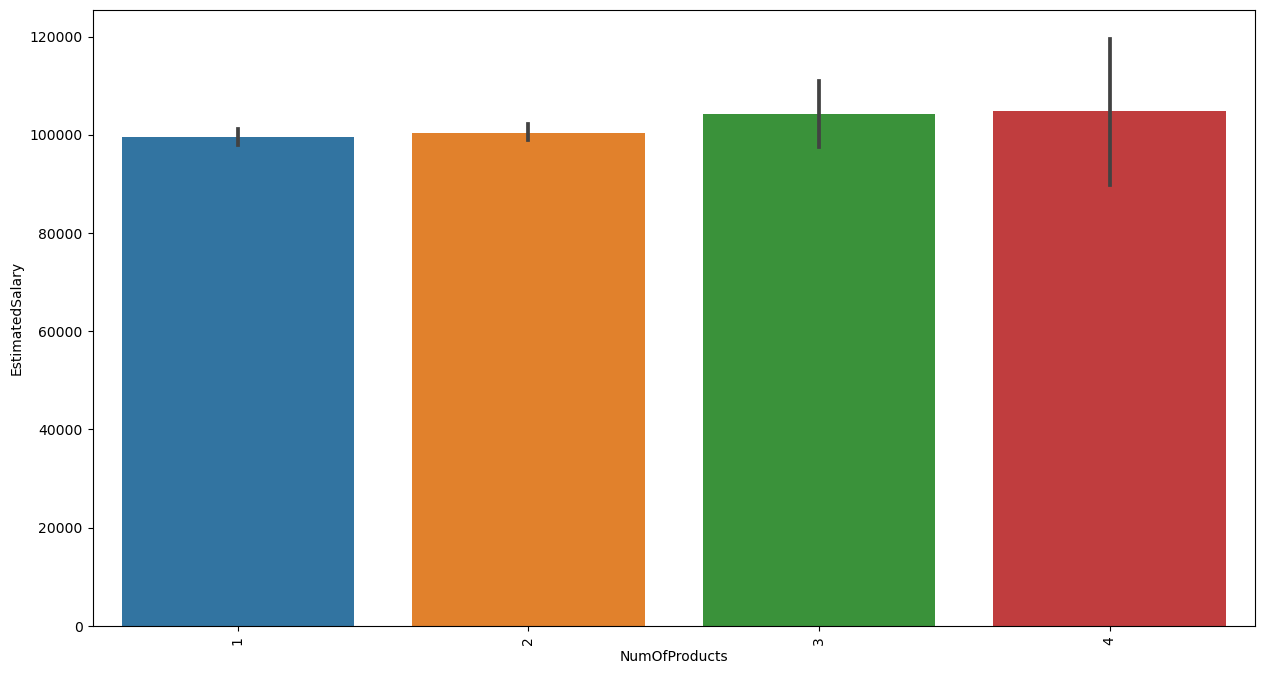

In [16]:
# Visualizing barplot where NumOfProducts is taken on x axis and EstimatedSalary is taken on y axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='NumOfProducts',y='EstimatedSalary',data=df);

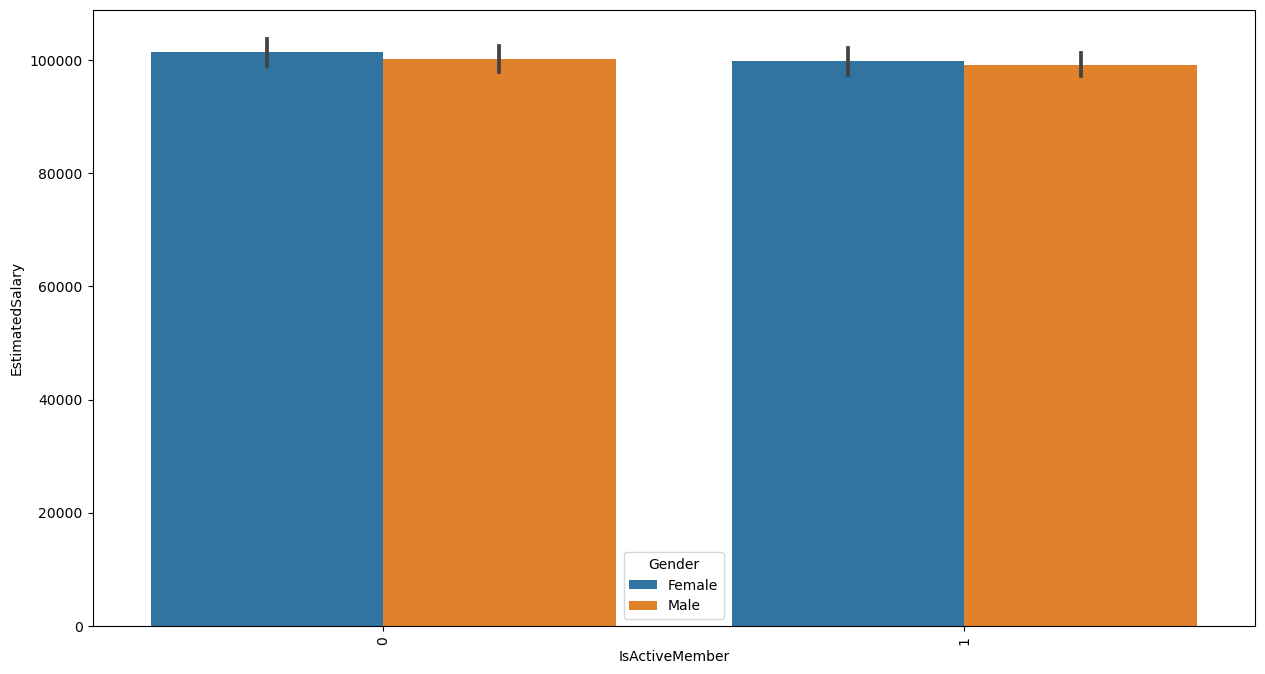

In [17]:
# Visualizing barplot where IsActiveMember is taken on x axis and EstimatedSalary is taken on y axis and key is gender
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df);

## Label Encoding 

In [18]:
# We convert categorical data into numeric data with the help of label encoding
cat_cols=['Geography','Gender']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes    

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
# displaying columns 
df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
# dropping uneccessary columns and removing them from the dataset 
df.drop(['RowNumber'],axis=1,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['Surname'],axis=1,inplace=True)

### Distribution PLot

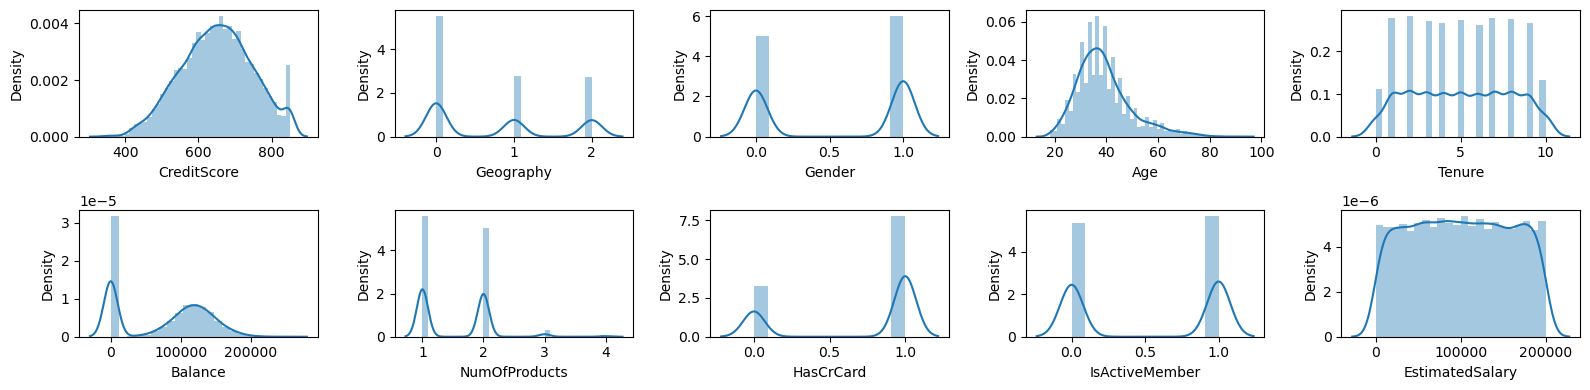

In [21]:
# Distribution plot will help us to check if the data is skewed or not
rows=2
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [22]:
# Splitting data into dependent and independent columns
X=df.drop(labels=['Exited'],axis=1)
Y=df['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [23]:
# Splitting the data set into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


### Logistic Regression

Model accuracy:  0.8
--------------------------------------------------
Confusion matrix:
 [[1575   41]
 [ 359   25]]


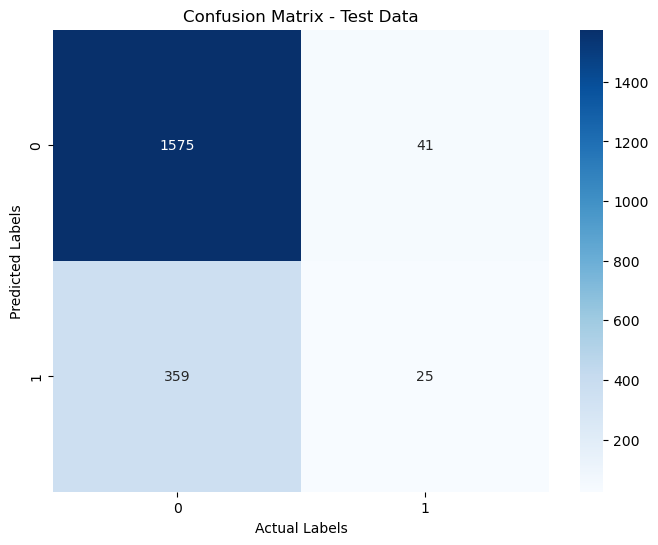

In [24]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on test
test_preds = log_reg.predict(X_test)

#accuracy on test
print("Model accuracy: ", accuracy_score(Y_test, test_preds))

print('-'*50)

# Confusion matrix
conf_matrix_test = confusion_matrix(Y_test, test_preds)

print("Confusion matrix:\n", conf_matrix_test)

# Visualize confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()

### Naive Bayes Classifier

Model accuracy:  0.7915
--------------------------------------------------
Confusion matrix:
 [[1550   66]
 [ 351   33]]


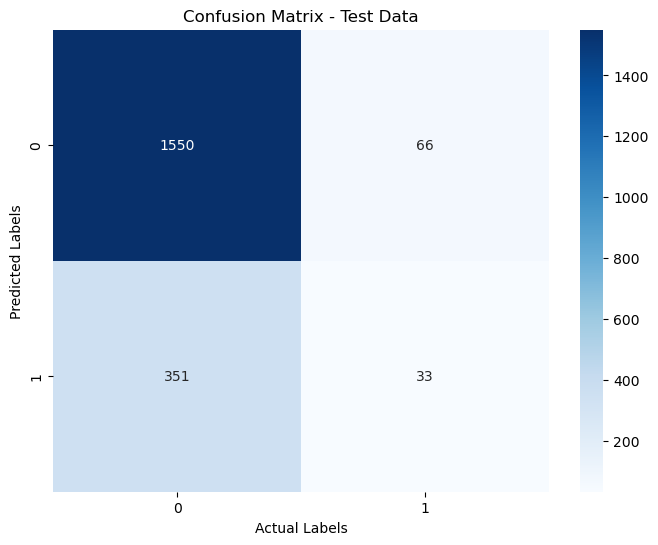

In [25]:
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)

#predict on test
test_preds2 = NB.predict(X_test)

#accuracy on test
print("Model accuracy: ", accuracy_score(Y_test, test_preds2))

print('-'*50)

# Confusion matrix
conf_matrix_test2 = confusion_matrix(Y_test, test_preds2)

print("Confusion matrix:\n", conf_matrix_test2)

# Visualize confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()

### Decision Tree Classifier

Model accuracy:  1.0
--------------------------------------------------
Confusion matrix: 
 [[1616    0]
 [   0  384]]


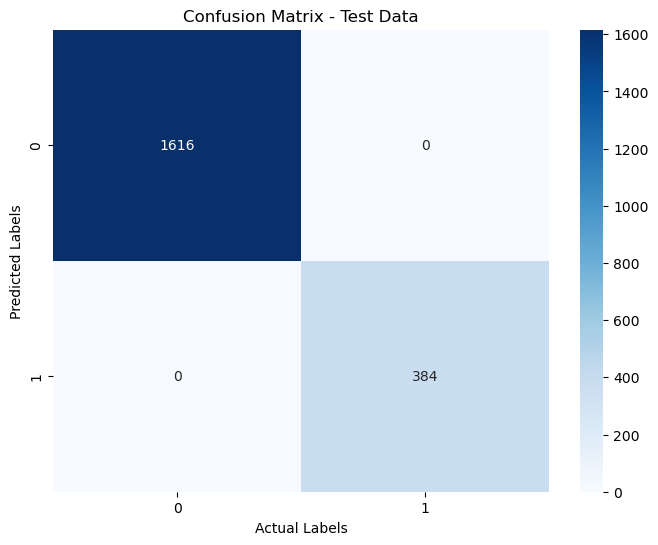

In [26]:
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on test
test_preds3 = DT.predict(X_test)

#accuracy on test
print("Model accuracy: ", accuracy_score(Y_test, test_preds3))

print('-'*50)

# Confusion matrix
conf_matrix_test3 = confusion_matrix(Y_test, test_preds3)

print("Confusion matrix: \n", conf_matrix_test3)

# Visualize confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test3, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()

### Random Forest Classifier

Model accuracy:  0.874
--------------------------------------------------
Confusion matrix: 
 [[1558   58]
 [ 194  190]]


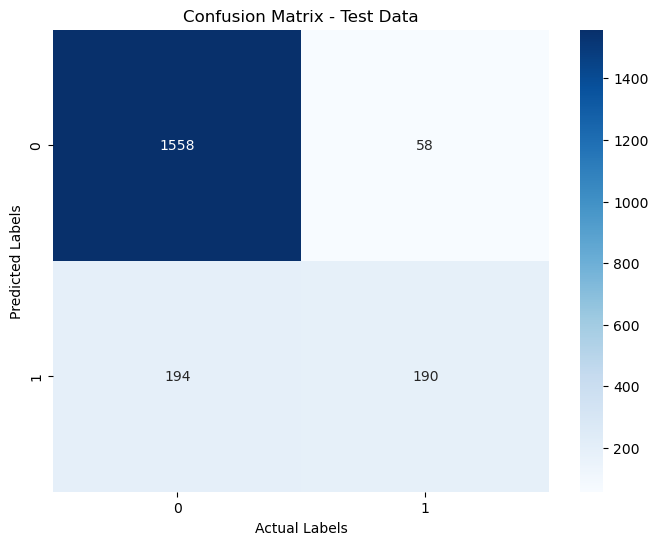

In [27]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train,Y_train)

#predict on test
test_preds4 = RF.predict(X_test)

#accuracy on test
print("Model accuracy: ", accuracy_score(Y_test, test_preds4))

print('-'*50)

# Confusion matrix
conf_matrix_test4 = confusion_matrix(Y_test, test_preds4)

print("Confusion matrix: \n", conf_matrix_test4)

# Visualize confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test4, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()

### K-Nearest Neighbors

Model accuracy:  0.7705
--------------------------------------------------
Confusion matrix: 
 [[1509  107]
 [ 352   32]]


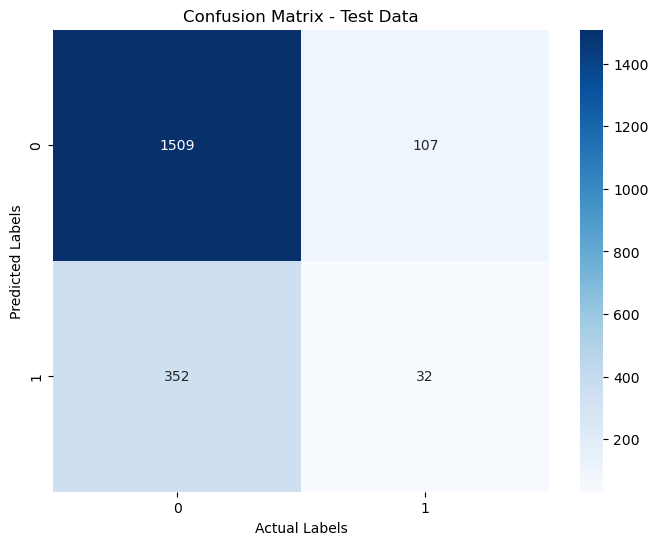

In [28]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train,Y_train)

#predict on test
test_preds5 = KNN.predict(X_test)

#accuracy on test
print("Model accuracy: ", accuracy_score(Y_test, test_preds5))

print('-'*50)

# Confusion matrix
conf_matrix_test5 = confusion_matrix(Y_test, test_preds5)

print("Confusion matrix: \n", conf_matrix_test5)

# Visualize confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test5, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()

### Support Vector Machine

Model accuracy:  0.7885
--------------------------------------------------
Confusion matrix: 
 [[1559   57]
 [ 366   18]]


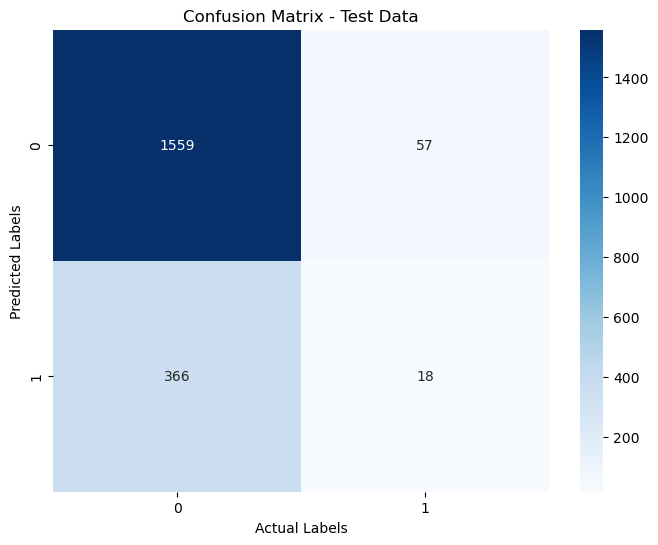

In [29]:
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on test
test_preds6 = SVM.predict(X_test)

#accuracy on test
print("Model accuracy: ", accuracy_score(Y_test, test_preds6))

print('-'*50)

# Confusion matrix
conf_matrix_test6 = confusion_matrix(Y_test, test_preds6)

print("Confusion matrix: \n", conf_matrix_test6)

# Visualize confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test6, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Test Data")
plt.show()